[[ 7.10478066e-08+0.j -5.14294709e-09+0.j  5.16919005e-06+0.j
   3.46944695e-18+0.j  0.00000000e+00+0.j -6.07153217e-18+0.j]
 [-5.14294709e-09+0.j  7.50252800e-07+0.j  1.00220286e-06+0.j
   8.67361738e-19+0.j  3.46944695e-18+0.j  3.46944695e-18+0.j]
 [ 5.16919005e-06+0.j  1.00220286e-06+0.j -5.45690579e-06+0.j
  -8.67361738e-18+0.j -1.38777878e-17+0.j -3.46944695e-18+0.j]
 [ 1.04083409e-17+0.j  8.67361738e-18+0.j -1.47451495e-17+0.j
   7.45794389e-01+0.j -2.61580607e-01+0.j  3.88106480e-02+0.j]
 [-6.93889390e-18+0.j  1.04083409e-17+0.j  6.93889390e-18+0.j
  -2.61580607e-01+0.j  3.67660700e-01+0.j -2.70471365e-02+0.j]
 [ 2.60208521e-18+0.j  3.46944695e-18+0.j  6.93889390e-18+0.j
   3.88106480e-02+0.j -2.70471365e-02+0.j  3.43986593e-01+0.j]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

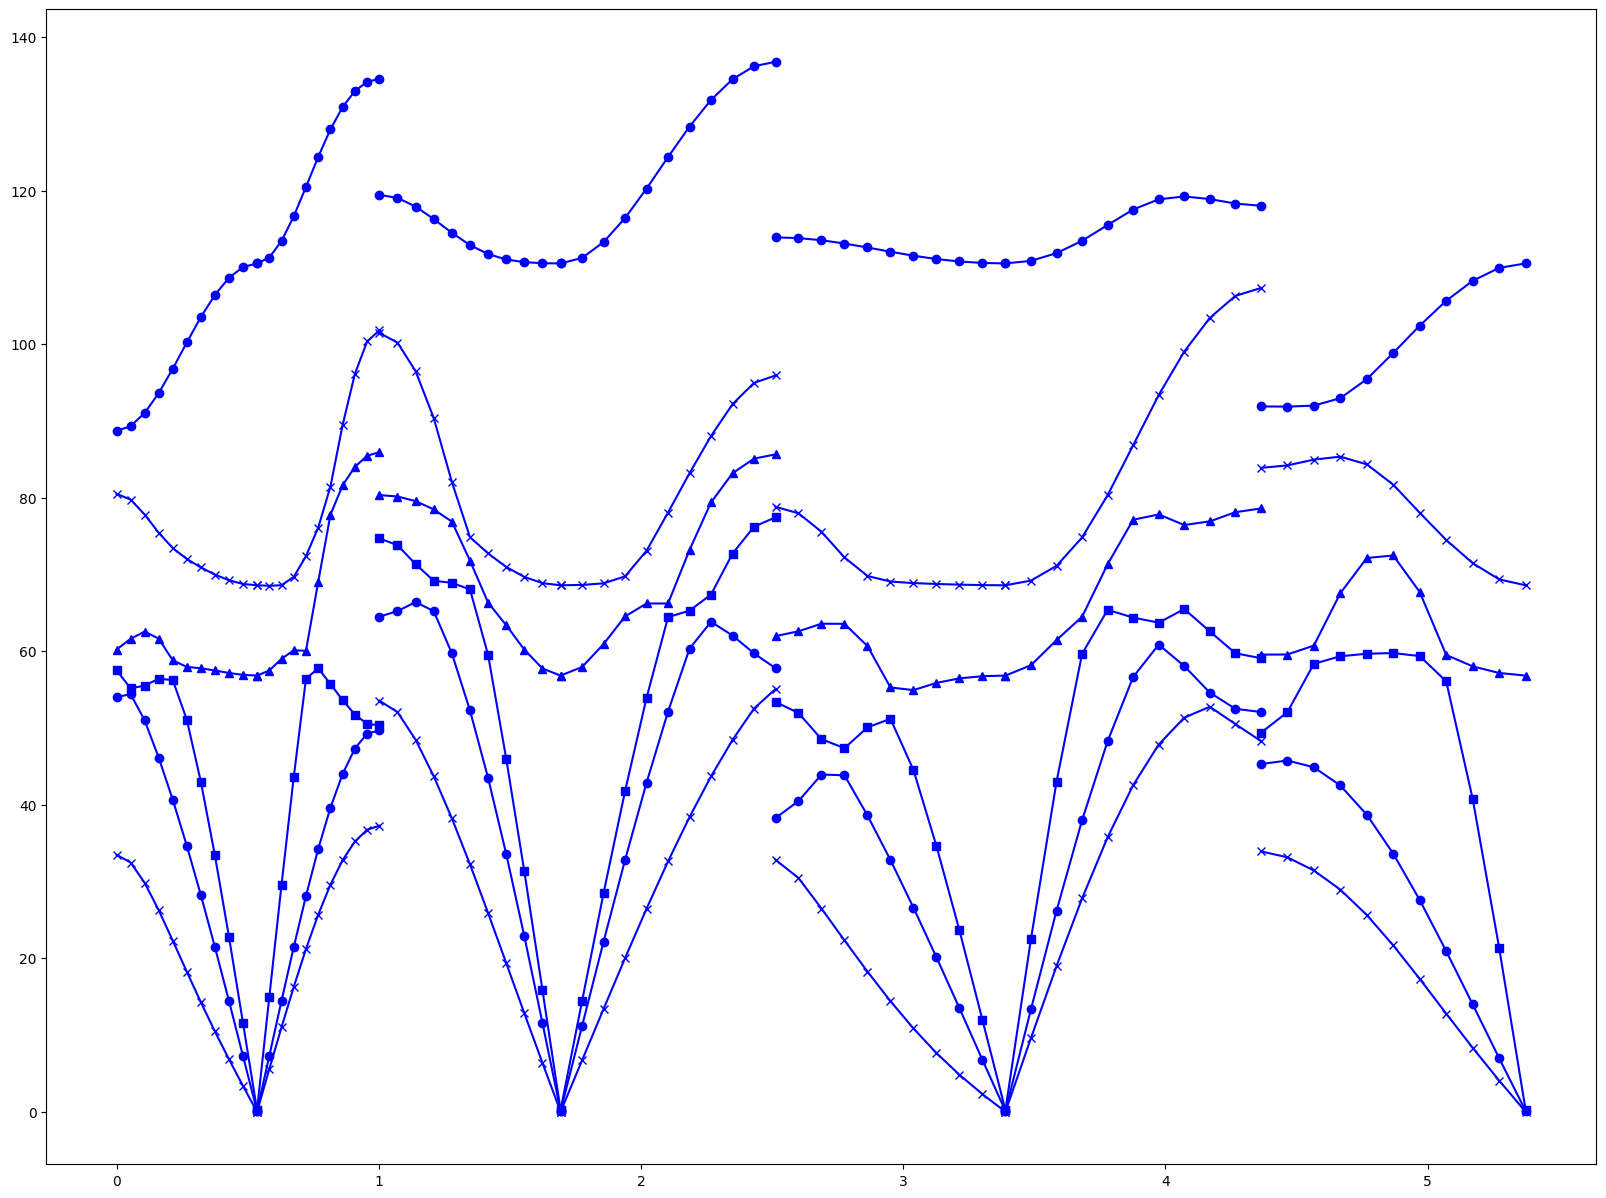

eigen values:
0.3454381070927498j
(0.10000941658707795+0j)
(0.2127422390781926+0j)
(56.81805257776067+0j)
(68.57930271133338+0j)
(110.50406584482734+0j)
k-path1 [[ 0.        +0.j -0.5       +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.53581024+0.j]
 [ 0.        +0.j  0.        +0.j  0.5       +0.j  0.46653749+0.j]]
False


In [ ]:
import os,sys,math,cmath
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
from tkinter import ttk
from tkinter import messagebox as mbox
from tkinter import filedialog as fd
import pandas as pd

base_num=6
matD=np.empty((base_num,base_num),dtype=complex)
pi=np.pi 
i_num=1j 
sf=0.903
#lattice parameter
lattice_parameter_a=7.302
lattice_parameter_b=3.882
lattice_parameter_c=5.873
lattice_parameter_alpha=91.13
lattice_parameter_beta=92.43
lattice_parameter_gamma=112.55
Alpha = np.radians(lattice_parameter_alpha)
Beta = np.radians(lattice_parameter_beta)
Gamma = np.radians(lattice_parameter_gamma)

a1 = (lattice_parameter_a,0,0)
a2 = (lattice_parameter_b * np.cos(Gamma), lattice_parameter_b * np.sin(Gamma), 0)
a3 = (lattice_parameter_c * np.cos(Beta), lattice_parameter_c * ( np.cos(Alpha) - np.cos(Beta) * np.cos(Gamma)) / np.sin(Gamma), np.sqrt(np.sin(Gamma)**2-np.cos(Alpha)**2-np.cos(Beta)**2+2*np.cos(Alpha)*np.cos(Beta)*np.cos(Gamma))*lattice_parameter_c/np.sin(Gamma))


b1 = 2 * np.pi * np.cross(a2, a3) / np.dot(a1, np.cross(a2, a3))
b2 = 2 * np.pi * np.cross(a3, a1) / np.dot(a1, np.cross(a2, a3))
b3 = 2 * np.pi * np.cross(a1, a2) / np.dot(a1, np.cross(a2, a3))

kpoint_num=8 
route_num=4 
kpr1=3 
kpr2=3
kpr3=3
kpr4=2
kpr=np.array([kpr1,kpr2,kpr3,kpr4])
k_num=10

file_name="read.xlsx"

df_1=pd.read_excel(file_name, sheet_name='phi_oniom2')  #调整输入表格，避免重复输入
df_5=pd.read_excel(file_name, sheet_name='gamma')
df_6=pd.read_excel(file_name, sheet_name='k-path')
df_1=df_1.fillna(0)
df_5=df_5.fillna(0)
df_6=df_6.fillna(0)

vectors = [b1,b2,b3,-b1,-b2,b1+b2,b1+b3,b2+b3,b1-b2,b2-b1,b3-b1,b3-b2,-b1-b2,b1+b2+b3,b1-b2+b3,-b1+b2+b3,-b1-b2+b3]

def FBZ_jugde(k1,k2,k3):
    for i in range(0,len(vectors)):
        if np.dot(k1*b1+k2*b2+k3*b3,vectors[i])>0.5*np.dot(vectors[i],vectors[i]):
            return False
    return True
#phi matrix put in 
n=0
for i in range(0,27):
    exec("matK"+str(26-i)+"=np.array(df_1.iloc[n:n+base_num,6:6+base_num],dtype=complex)")
    n=n+14

#gamma matrix put in
n=0
for i in range(0,27):
    exec("matG"+str(26-i)+"=np.array(df_1.iloc[n:n+base_num,20:20+base_num],dtype=complex)")
    n=n+14

#k-path coordinate put in 
for i in range(1,route_num+1):
    exec("matR"+str(i)+"=np.array(df_6.iloc[0:kpr"+str(i)+",7+5*(i-1):11+5*(i-1)],dtype=complex)")

matG=np.array(df_5.iloc[0:base_num,0:base_num],dtype=complex)

list_eigen=[[[0] * (k_num+1) for i in range(max(kpr1,kpr2,kpr3,kpr4))] for j in range(route_num)]

for r in range(0, route_num):
    exec("matR=matR"+str(r+1)+"")
    for p in range(0, kpr[r]-1):
        for k in range(0, k_num+1):
            a_i=(2*pi*(k/k_num*(matR[p+1,0]-matR[p,0])+matR[p,0]))*i_num
            b_i=(2*pi*(k/k_num*(matR[p+1,1]-matR[p,1])+matR[p,1]))*i_num
            c_i=(2*pi*(k/k_num*(matR[p+1,2]-matR[p,2])+matR[p,2]))*i_num
            
            matK=np.zeros((base_num,base_num),dtype=complex)
            
            
            for a in range(-1,2):
                for b in range(-1,2):
                    for c in range(-1,2):
                        n=(a+1)*9+(b+1)*3+c+1
                        #exec("matK"+str(n)+"=np.dot(np.dot(matG"+str(n)+",matK"+str(n)+"),matG"+str(n)+".T)")
                        #exec("matD=np.dot(matG,matK"+str(n)+")")
                        #exec("matK"+str(n)+"=np.dot(matD,matG.T)")
                        exec("matK+=np.dot(np.dot(matG"+str(n)+",matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)),matG"+str(n)+".T)")
                        #exec("matK+=matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)")
            
            #exec("matD=np.dot(matG13,matK)")
            #exec("matK=np.dot(matD,matG13.T)")

            if(r==0):
                if(p==1):
                    if(k==0):
                        #print(str(kx)+", "+str(ky)+", "+str(kz))
                        print(matK)
                        
                        

            l,P=np.linalg.eig(matK)

            l=np.sort(l,axis=0)
            v=np.transpose(P)

            list_eigen[r][p][k]=l.tolist()

y=[[[[0.0+0j]*(k_num+1) for k in range(base_num)] for i in range(max(kpr1,kpr2,kpr3,kpr4))] for j in range(route_num)]
for r in range(0,route_num):
    for p in range(0, kpr[r]-1):
        for value in range(0,base_num): #value 震动模式的序列
            for k in range(0,k_num+1):
                y[r][p][value][k]=list_eigen[r][p][k][value]

np_eigen=np.array(y,dtype=complex)

plt.clf()

plt.figure(figsize=(20,15))
x1=0
#计算各个高对称点之间的步长，以此给x赋值。
for r in range(0,route_num):
    exec("matR=matR"+str(r+1)+"")
    for p in range(0, kpr[r]-1):
        s=matR[p+1,3]
        x=np.array([x1,x1+0.1*s,x1+0.2*s,x1+0.3*s,x1+0.4*s,x1+0.5*s,x1+0.6*s,x1+0.7*s,x1+0.8*s,x1+0.9*s,x1+s])
        x1=x1+s
        
        plt.plot(x,sf*np.sqrt(np_eigen[r][p][0]/0.000059),color='b',marker='x')
        #plt.plot(x,sf*np.sqrt(np_eigen[r][p][1]/0.000059),'b-o')
        #plt.plot(x,sf*np.sqrt(np_eigen[r][p][2]/0.000059),'b-s')
        #plt.plot(x,sf*np.sqrt(np_eigen[r][p][3]/0.000059),'b-^')
        #plt.plot(x,sf*np.sqrt(np_eigen[r][p][4]/0.000059),'b-x')
        #plt.plot(x,sf*np.sqrt(np_eigen[r][p][5]/0.000059),'b-o')
        #plt.plot(x,np.sqrt(np_eigen[r][p][6]/0.000059),'b-s') 根据计算base数需要进行调整
        #plt.plot(x,np.sqrt(np_eigen[r][p][7]/0.000059),'g-^')
        #plt.plot(x,np.sqrt(np_eigen[r][p][8]/0.000059),'r-x')
        #plt.plot(x,np.sqrt(np_eigen[r][p][9]/0.000059),'c-o')
        #plt.plot(x,np.sqrt(np_eigen[r][p][10]/0.000059),'m-s')
        #plt.plot(x,np.sqrt(np_eigen[r][p][11]/0.000059),'y-^')
        
        #虚数部分的图像观察
        plt.plot(x,sf*np_eigen[r][p][0]/0.000059,color='r',marker='x')

plt.show()

print("eigen values:")
print(sf*np.sqrt(np_eigen[0][1][0][0]/0.000059))
print(sf*np.sqrt(np_eigen[0][1][1][0]/0.000059))
print(sf*np.sqrt(np_eigen[0][1][2][0]/0.000059))
print(sf*np.sqrt(np_eigen[0][1][3][0]/0.000059))
print(sf*np.sqrt(np_eigen[0][1][4][0]/0.000059))
print(sf*np.sqrt(np_eigen[0][1][5][0]/0.000059))

print("k-path1",matR1)
print(FBZ_jugde(-0.5,-0.5,0.5))



In [ ]:
#DOS计算模块：由4分之一FBZ的统计得到，整体应该分为计算部分和能量分拣部分。
#计算区间的判断为各个方向（逆向量）的极值（循环范围）和数个不等式（判断语句）组成。

s=0.01
#b1=0.933074978328598
#b2=1.07162048621218
#b3=1.75386677814264
B1=np.linalg.norm(b1)
B2=np.linalg.norm(b2)
B3=np.linalg.norm(b3)
b_length1=math.floor(B1/s)
b_length2=math.floor(B2/s)
b_length3=math.floor(B3/s)
list_eigenfbz=[[[0] * (math.floor(b_length3/2)+1) for i in range(b_length2)] for j in range(b_length1)]

for m1 in range(0,b_length1):#取值范围由高对称点中对应坐标的极值决定（系数乘以模长），下方的判断语句由解决不等式问题得到
    M1=m1-b_length1/2
    for m2 in range(0,b_length2):
        M2=m2-b_length2/2
        for m3 in range(0,math.floor(b_length3/2)+1):
                
                a_i=(2*pi*M1*s/B1)*i_num
                b_i=(2*pi*M2*s/B2)*i_num
                c_i=(2*pi*m3*s/B3)*i_num
                matK=np.zeros((base_num,base_num),dtype=complex)

                for a in range(-1,2):
                    for b in range(-1,2):
                        for c in range(-1,2):
                            n=(a+1)*9+(b+1)*3+c+1
                            #exec("matK+=np.dot(np.dot(matG"+str(n)+",matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)),matG"+str(n)+".T)")
                            exec("matK+=np.dot(np.dot(matG"+str(n)+",matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)),matG"+str(n)+".T)")

                l,P=np.linalg.eig(matK)

                l=np.sort(l,axis=0)
                v=np.transpose(P)

                list_eigenfbz[m1][m2][m3]=l.tolist()

z=[[[[0.0+0j]*(base_num) for i in range(math.floor(b_length3/2)+1)] for j in range(b_length2)] for k in range(b_length1)]
for m1 in range(0,b_length1):
    for m2 in range(0,b_length2):
        for m3 in range(0,math.floor(b_length3/2)+1):
            for value in range(0,6):
                    z[m1][m2][m3][value]=list_eigenfbz[m1][m2][m3][value]

np_eigenfbz=np.array(z,dtype=complex)                
H_frequency=150


                         

In [ ]:
plt.clf()
plt.figure(figsize=(5,15))
N=0 #计算的点的总数
se=1 #step_length_of_energy
w=[0]*H_frequency
for x in range(0,H_frequency):#范围由声子谱范围决定
    n=0
    for m1 in range(0,b_length1):#取值范围由高对称点中对应坐标的极值决定（系数乘以模长），下方的判断语句由解决不等式问题得到
        k1=(m1-b_length1/2)*s/B1
        for m2 in range(0,b_length2):
            k2=(m2-b_length2/2)*s/B2
            for m3 in range(0,math.floor(b_length3/2)+1):
                k3=(m3*s/B3)
                #if FBZ_jugde(k1,k2,k3)==True:
                for value in range(0,base_num):
                    #if FBZ_jugde((m1-b_length1/2)*s/B1,(m2-b_length2/2)*s/B2,(m3*s/B3))==True:
                        if x<=np.real(sf*np.sqrt(np_eigenfbz[m1][m2][m3][value]/0.000059))<x+1:
                            n=n+1
    n=n*2
    N=N+n
    w[x]=n
for x in range(0,H_frequency):
    plt.barh(x,w[x]*base_num/(N*se),color='c')

plt.show()

In [ ]:
for x in range(0,150):
    print(x,w[x]*base_num/(N*se))


In [2]:
#FBZ边界选择改变测试
s=0.01
#b1=0.933074978328598
#b2=1.07162048621218
#b3=1.75386677814264
B1=np.linalg.norm(b1)
B2=np.linalg.norm(b2)
B3=np.linalg.norm(b3)
b_length1=math.floor(B1/s)
b_length2=math.floor(B2/s)
b_length3=math.floor(B3/s)
list_eigenfbz=[[[0] * (b_length3) for i in range(b_length2)] for j in range(b_length1)]

for m1 in range(0,b_length1):#取值范围由高对称点中对应坐标的极值决定（系数乘以模长），下方的判断语句由解决不等式问题得到
    for m2 in range(0,b_length2):
        for m3 in range(0,b_length3):
                
                a_i=(2*pi*m1*s/B1)*i_num
                b_i=(2*pi*m2*s/B2)*i_num
                c_i=(2*pi*m3*s/B3)*i_num
                matK=np.zeros((base_num,base_num),dtype=complex)

                for a in range(-1,2):
                    for b in range(-1,2):
                        for c in range(-1,2):
                            n=(a+1)*9+(b+1)*3+c+1
                            #exec("matK+=np.dot(np.dot(matG"+str(n)+",matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)),matG"+str(n)+".T)")
                            exec("matK+=np.dot(np.dot(matG"+str(n)+",matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)),matG"+str(n)+".T)")

                l,P=np.linalg.eig(matK)

                l=np.sort(l,axis=0)
                v=np.transpose(P)

                list_eigenfbz[m1][m2][m3]=l.tolist()

z=[[[[0.0+0j]*(base_num) for i in range(b_length3)] for j in range(b_length2)] for k in range(b_length1)]
for m1 in range(0,b_length1):
    for m2 in range(0,b_length2):
        for m3 in range(0,b_length3):
            for value in range(0,6):
                    z[m1][m2][m3][value]=list_eigenfbz[m1][m2][m3][value]

np_eigenfbz=np.array(z,dtype=complex)                
H_frequency=150

<Figure size 640x480 with 0 Axes>

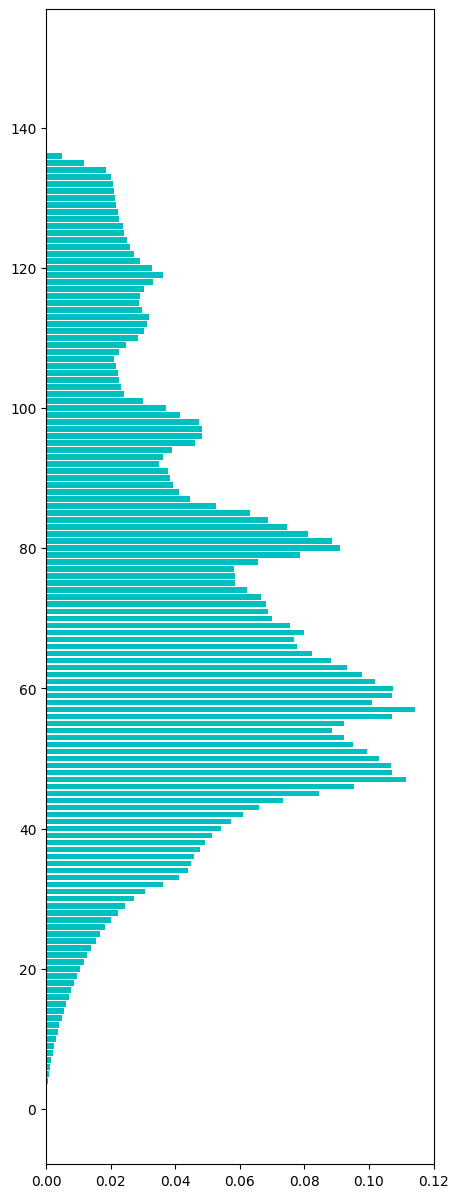

0 1.3781816615702657e-05
1 7.235453723243895e-05
2 0.00020730149159452747
3 0.0003962272277014514
4 0.0006362605337582726
5 0.0009480741346885453
6 0.0012403634954132393
7 0.0016607089021921703
8 0.0020471740097908323
9 0.0025392997114432147
10 0.0030279799589416714
11 0.003553985959774323
12 0.004142584377736624
13 0.004782864608007809
14 0.005459322106895215
15 0.006151284149475286
16 0.006947758301391102
17 0.007756291542845658
18 0.008616506596609098
19 0.009565154973656632
20 0.010542515468653545
21 0.011680663824166989
22 0.012696498557216072
23 0.014036205980734169
24 0.015322508864866417
25 0.016813242028798255
26 0.01837173579109063
27 0.02014327346856741
28 0.022191021720717227
29 0.024352469959946596
30 0.027113427221959027
31 0.03062951318604017
32 0.036105488321346024
33 0.04100894382474123
34 0.043901402586961825
35 0.04487818883959975
36 0.04581592661182652
37 0.0475966521670471
38 0.04933718075713855
39 0.05144235324518713
40 0.05413612415119801
41 0.05741734499045322
4

In [4]:
plt.clf()
plt.figure(figsize=(5,15))
N=0 #计算的点的总数
se=1 #step_length_of_energy
w=[0]*H_frequency
for x in range(0,H_frequency):#范围由声子谱范围决定
    n=0
    for m1 in range(0,b_length1):#取值范围由高对称点中对应坐标的极值决定（系数乘以模长），下方的判断语句由解决不等式问题得到
        for m2 in range(0,b_length2):
            for m3 in range(0,b_length3):
                #if FBZ_jugde(k1,k2,k3)==True:
                for value in range(0,base_num):
                    #if FBZ_jugde((m1-b_length1/2)*s/B1,(m2-b_length2/2)*s/B2,(m3*s/B3))==True:
                        if x<=np.real(sf*np.sqrt(np_eigenfbz[m1][m2][m3][value]/0.000059))<x+1:
                            n=n+1
    n=n
    N=N+n
    w[x]=n
for x in range(0,H_frequency):
    plt.barh(x,w[x]*base_num/(N*se),color='c')

plt.show()

for x in range(0,150):
    print(x,w[x]*base_num/(N*se))